In [8]:
# Import pertinent packages
import climt
import sympl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")
import cartopy.crs as ccrs
from gfs_dynamical_core import GFSDynamicalCore
from datetime import timedelta
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [2]:
# Set the internal timestep to be used by the dynamic core
timestep = timedelta(minutes=20)

# Call the convection parameter from the climt package
convection = climt.EmanuelConvection()

# Call the Radiation parameter from the climt package: only call every 1 hr
radiation_timestep = timedelta(minutes=60)
radiation = sympl.UpdateFrequencyWrapper(climt.GrayLongwaveRadiation(), 
                                         radiation_timestep)
# Call the Simple physics parameter from the climt package using a sympl time wrappeer
simple_physics = sympl.TimeDifferencingWrapper(climt.SimplePhysics())

In [3]:
# Cet up a grid for the dynamic core to function within
grid = climt.get_grid(nx=62, ny=62, nz=10)
# Use Held-Suarez forcing to make the dynamic core more realistic
held_suarez = climt.HeldSuarez() 
# call NOAA Global Forcasting System dynamic core w/ Held-Suarez forcing
dycore = GFSDynamicalCore([held_suarez]) 
 # allows us to call the state of the model
state = climt.get_default_state([dycore], grid_state=grid) 
#list(state.keys())


In [4]:
# Function to plot variables of interest from the "state" output.
def plot_sfc_map(state, plot_names = ['eastward_wind', 'air_temperature',
                'northward_wind', 'atmosphere_relative_vorticity']):
    """Plots all zonal winds for different rotation rates"""
    fig = plt.figure(figsize=(9,5))
    for i in range(len(plot_names)):
        ax = fig.add_subplot(2, 2, i+1, projection=ccrs.PlateCarree())
        state[plot_names[i]].coords['lat'] = state['latitude'][:,0]
        state[plot_names[i]].coords['lon'] = state['longitude'][0]
        if 'surface' in plot_names[i]:
            plot_state = state[plot_names[i]]
        else : 
            plot_state = state[plot_names[i]][0]
        data = plot_state
        data, lon = add_cyclic_point(data, coord=state['longitude'][0])
        lat = state['latitude'][:,0]
        if np.min(data)<0.:
            levels = np.linspace(-np.max(np.abs(data)), np.max(np.abs(data)), 9)
            cmap = 'RdBu_r'
            plt.contourf(lon, lat, data, cmap=cmap, levels = levels, robust=True)

        else:
            plt.contourf(lon, lat, data, robust=True)
        plt.colorbar()
        plt.tight_layout()
        ax.set_title(plot_names[i].replace('_',' '))
        ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
        ax.set_aspect('auto', adjustable=None)
    plt.tight_layout()
    fig.subplots_adjust(top=0.9)
    plt.suptitle('Surface Map', fontsize=16)
    

plt.show()

/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


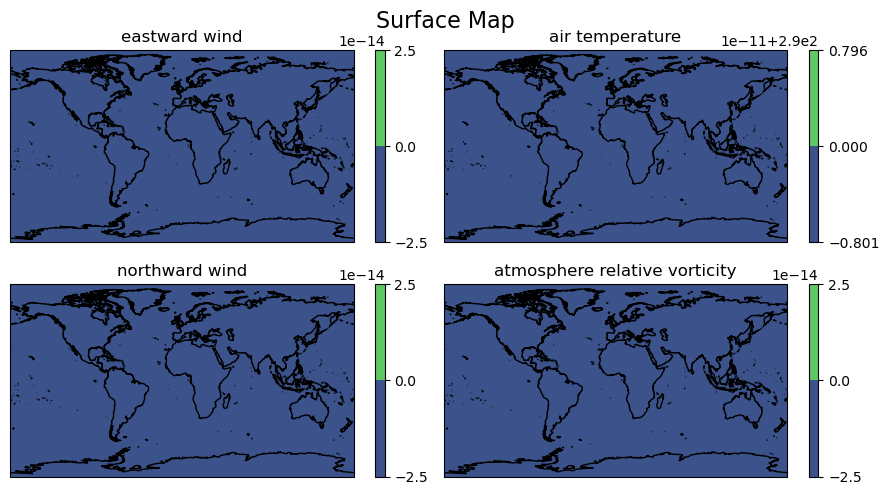

In [5]:
plot_sfc_map(state)

/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


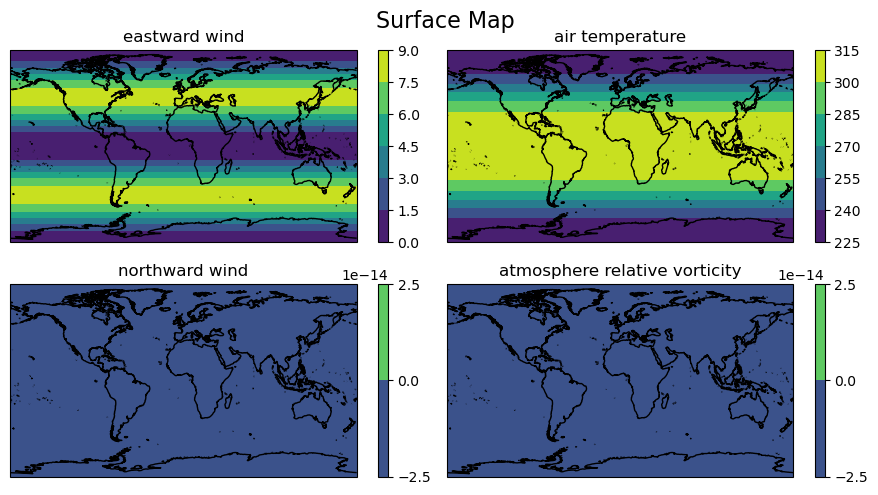

In [6]:
dcmip = climt.DcmipInitialConditions(add_perturbation=False)
init_state = dcmip(state)
state.update(init_state)
plot_sfc_map(state)

2000-01-01 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


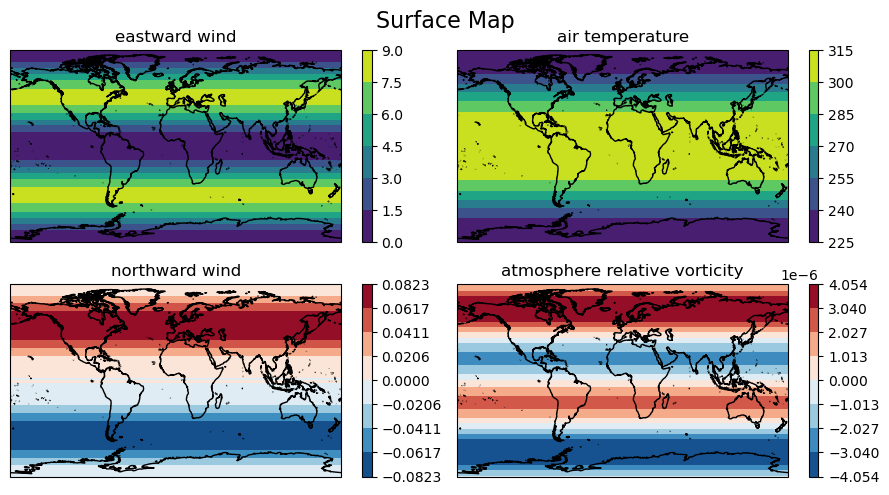

2000-01-15 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


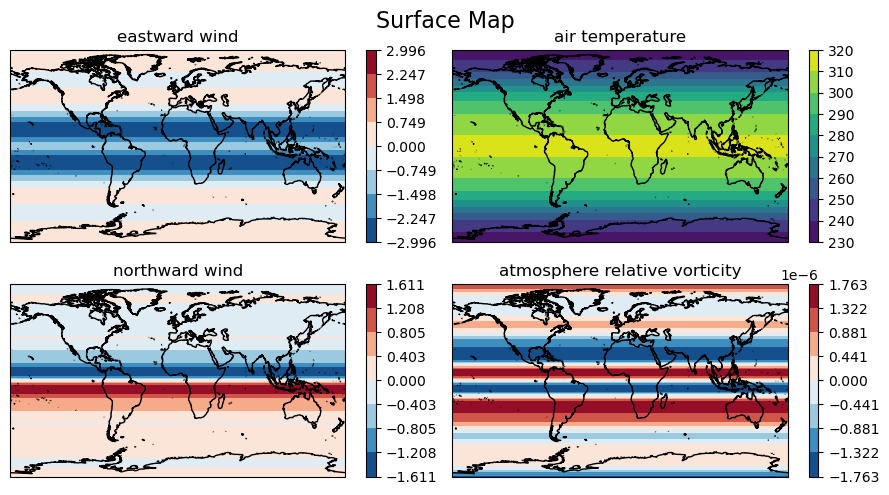

2000-01-29 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


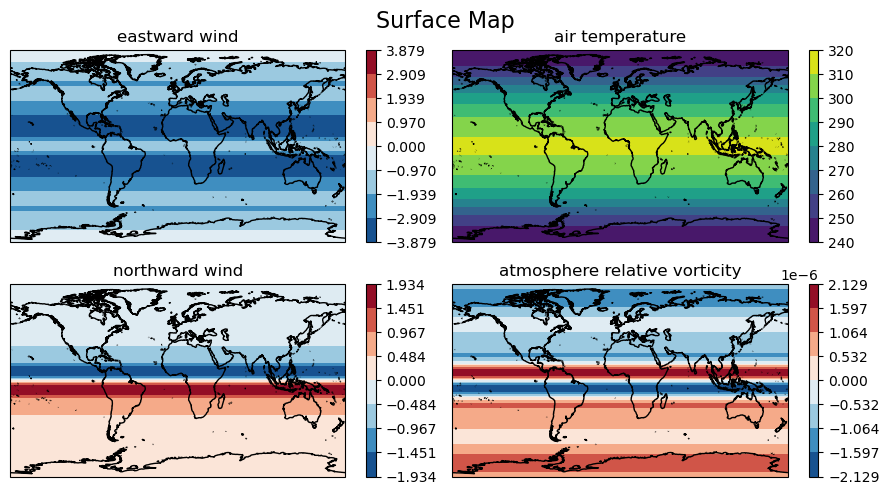

2000-02-12 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


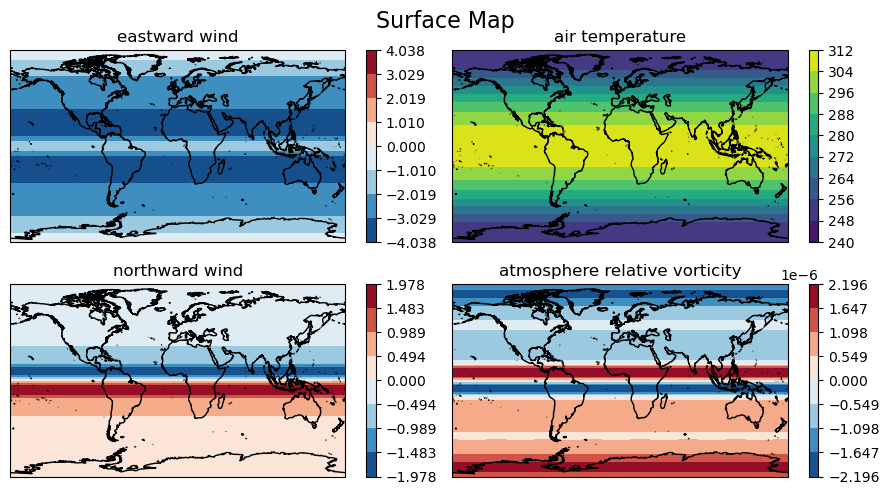

2000-02-26 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


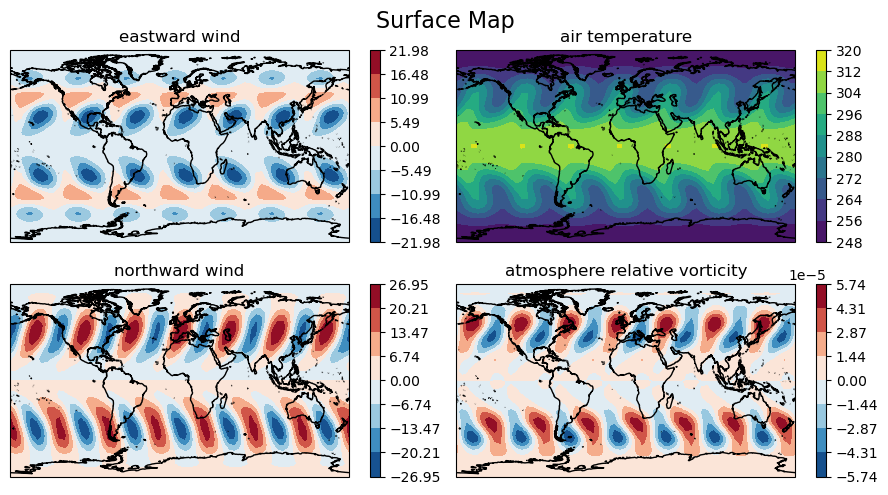

2000-03-11 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


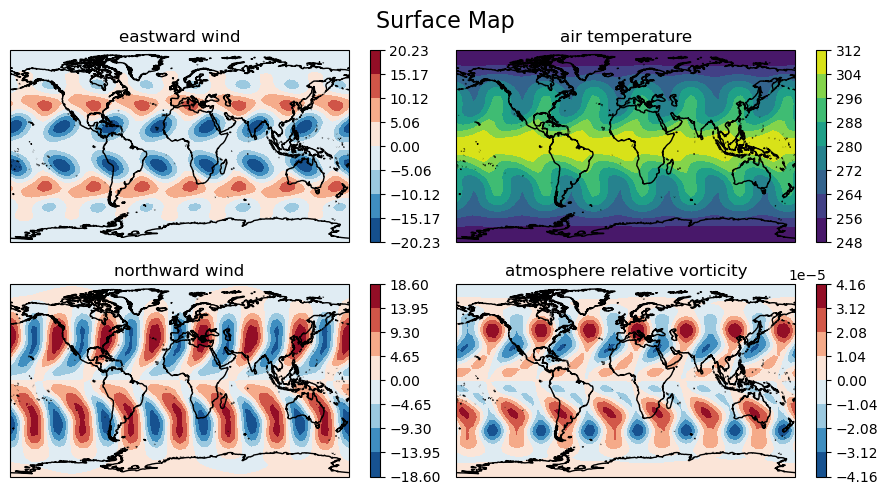

2000-03-25 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


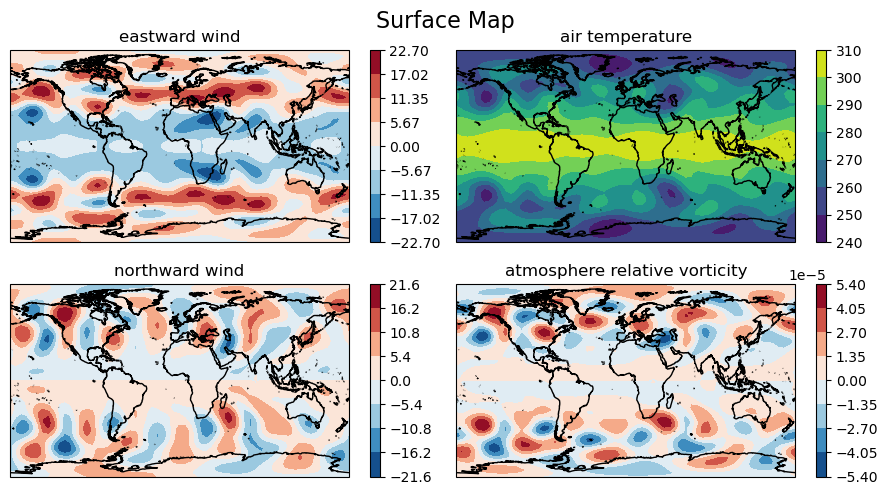

2000-04-08 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


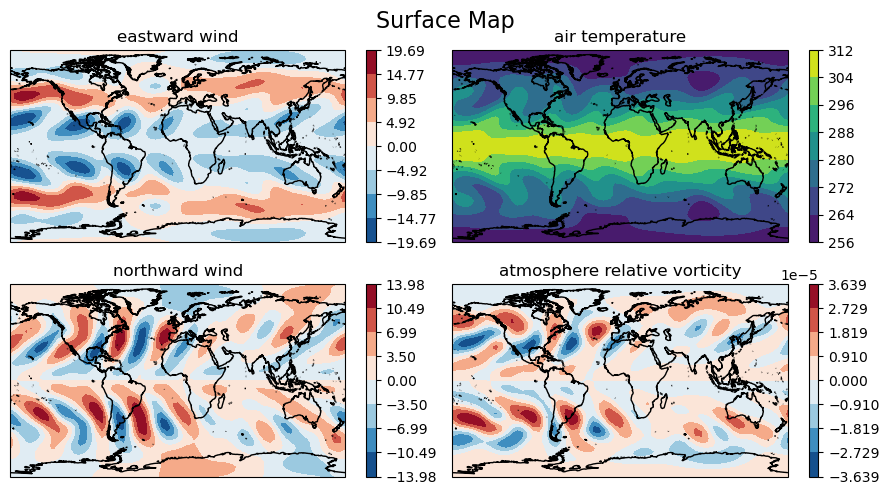

2000-04-22 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


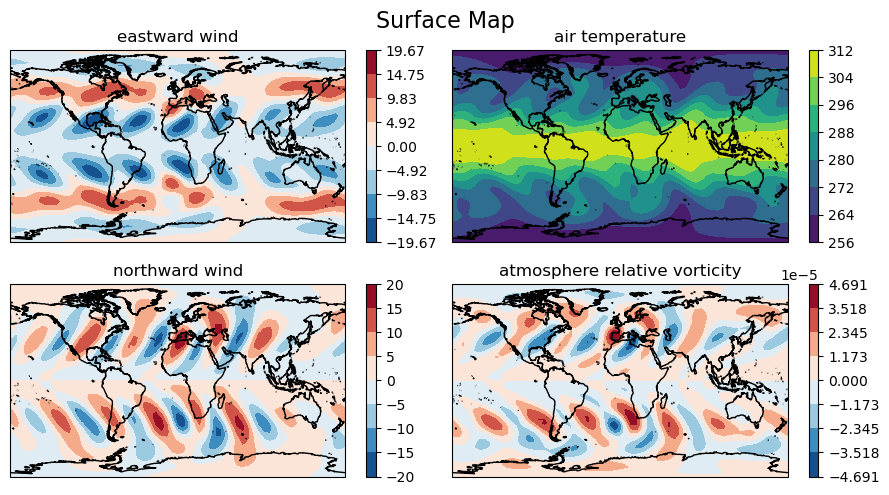

2000-05-06 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


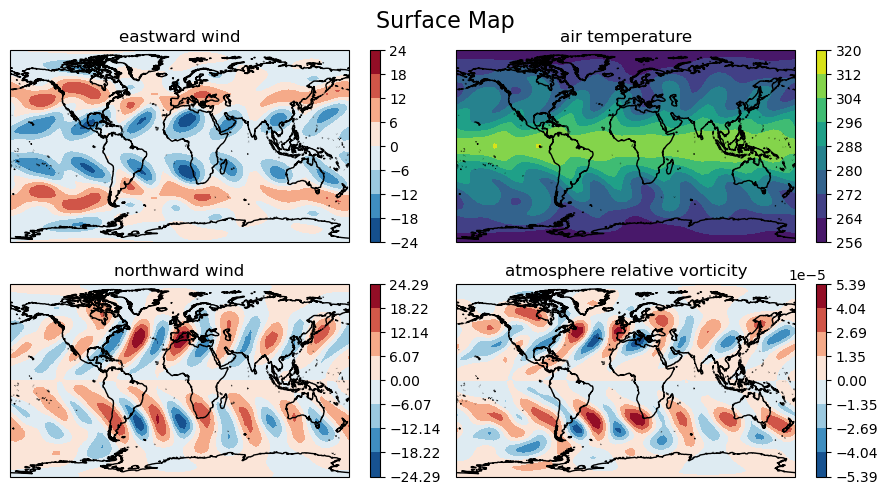

2000-05-20 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


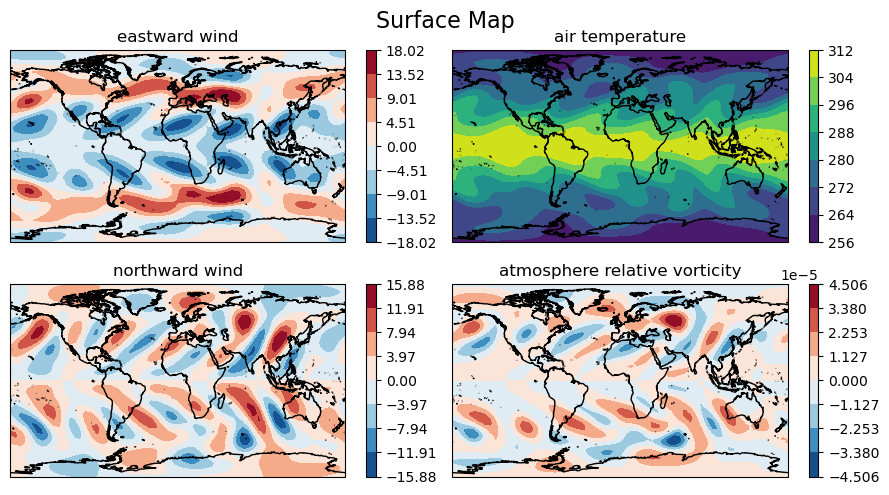

2000-06-03 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


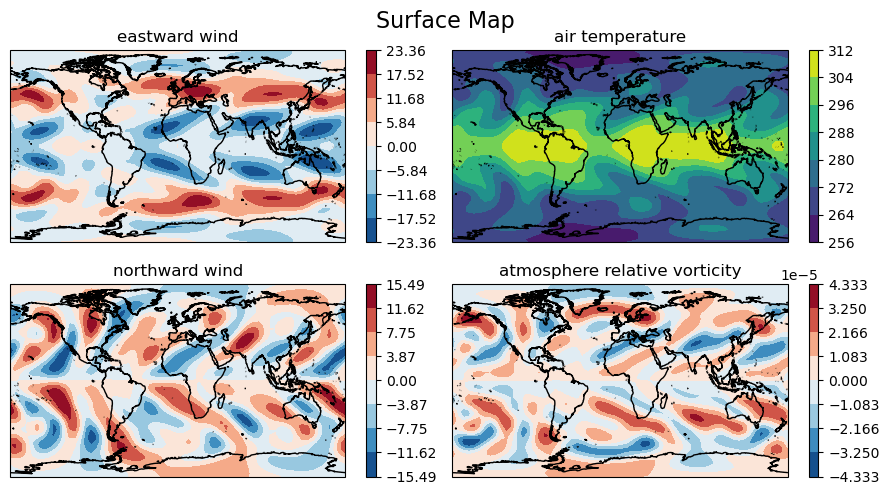

2000-06-17 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


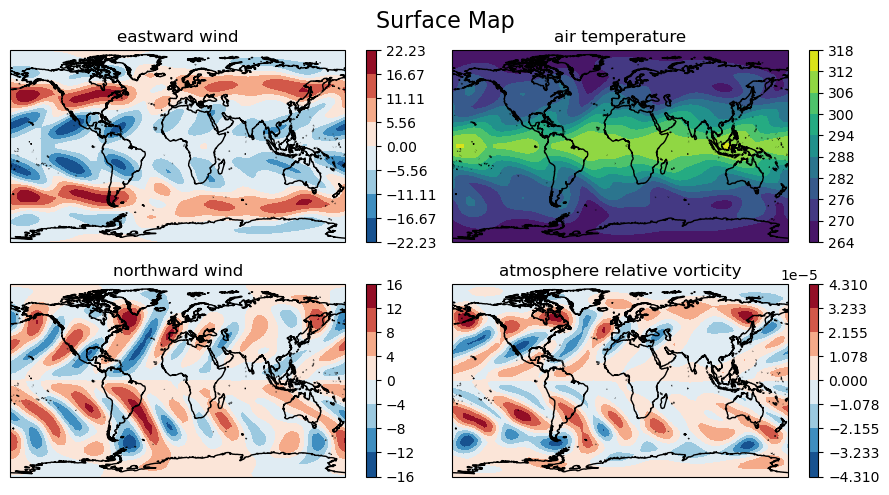

2000-07-01 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


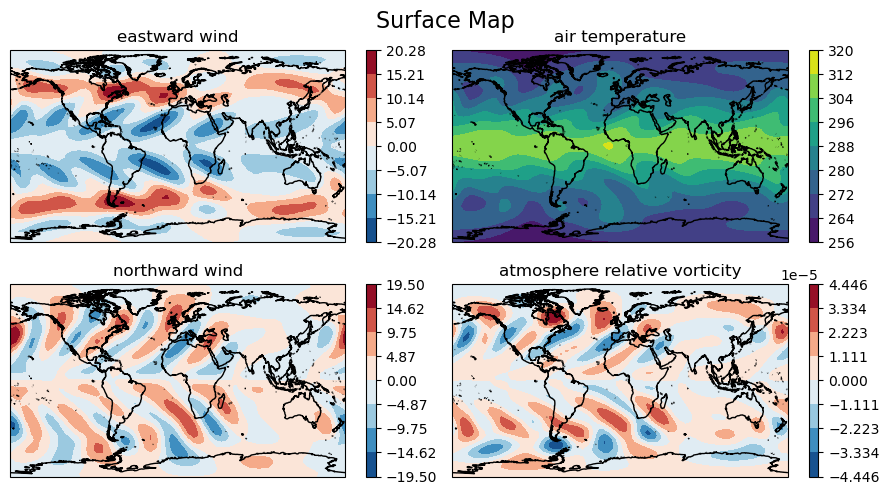

2000-07-15 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


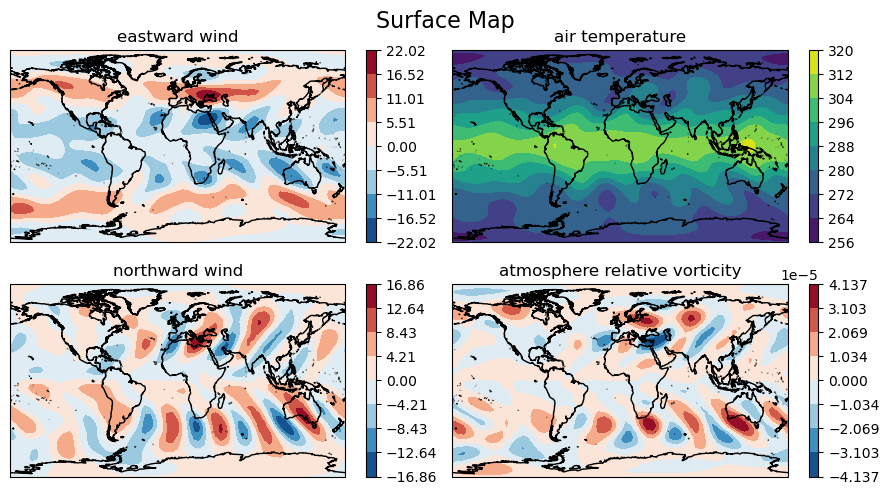

2000-07-29 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


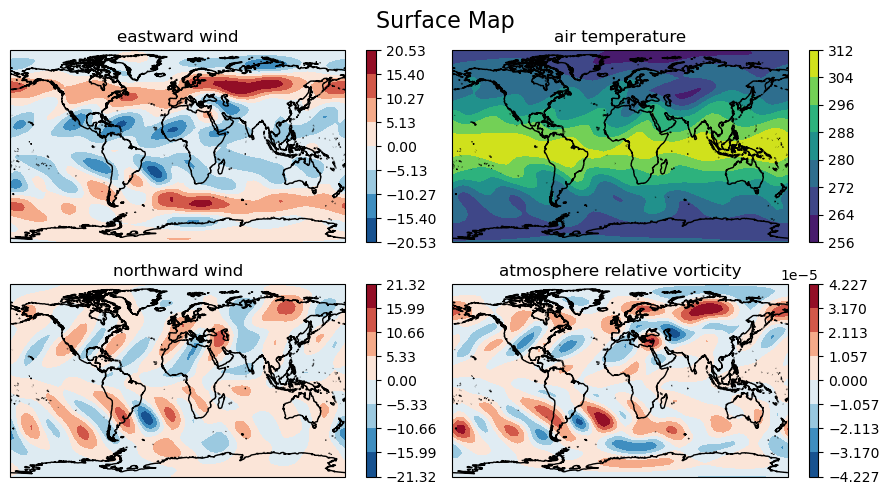

2000-08-12 00:20:00


/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)
/home/g42b265/.conda/envs/new-project-env/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1642: UserWarning: The following kwargs were not used by contour: 'robust'
  result = super().contourf(*args, **kwargs)


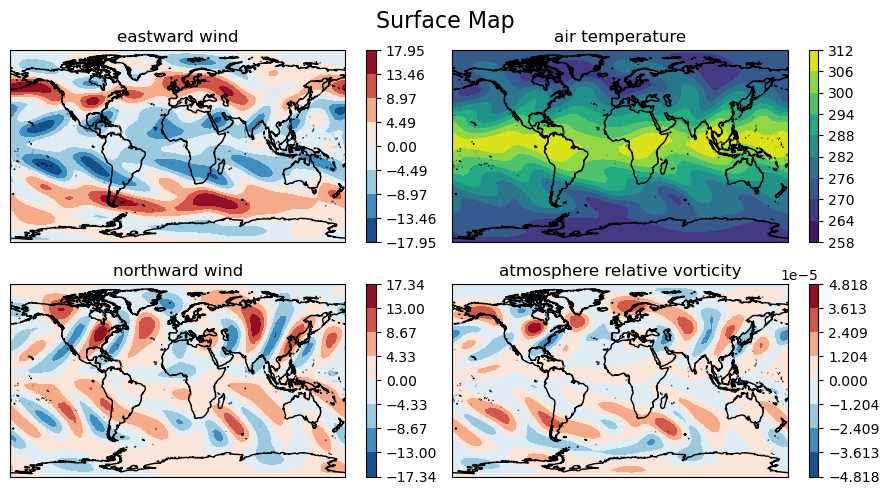

Finished at  2000-08-20 00:00:00
CPU times: user 1h 19min, sys: 44.1 s, total: 1h 19min 44s
Wall time: 12min 33s


In [7]:
# time the time it takes to run the code chunk
%%time
# code to step the model forward and output surface maps.
for step in range(24*12*58):
    diagnostics, new_state = dycore(state, timestep)
    state.update(new_state)
    state['time'] += timestep
    if step%(24*3*14) == 0:
        print(state['time'])
        plot_sfc_map(new_state)
        plt.show()
print("Finished at ", state['time'])

2000-08-20 00:00:00


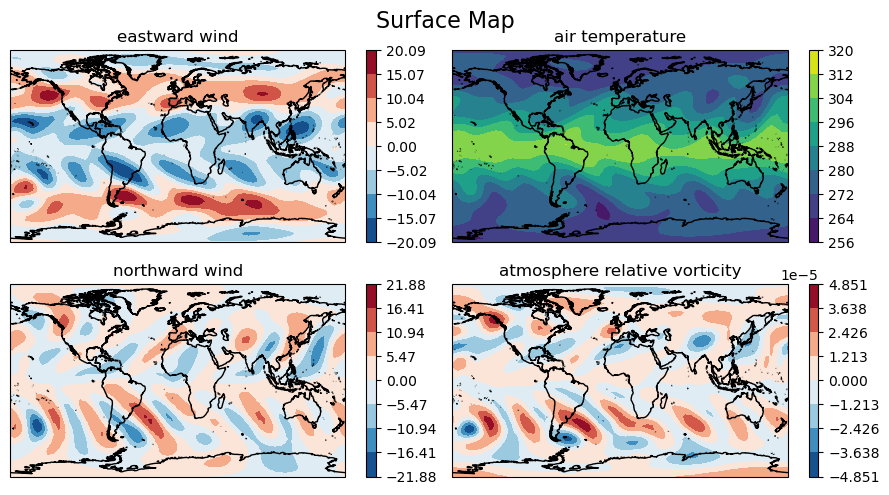

In [9]:
print(state['time'])
plot_sfc_map(new_state)